# An Analysis of Obesisy in First Class Children in Ireland

## Introduction

In this notebook I am creating a dataset to simulate a hypothetical study on the BMI of primary school first class children in 2016 based on their gender, age, height, and weight. I have based the simulation on a subset of the findings of the Childhood Obesity Surveillance Initiative (COSI). 

The National Nutrition Centre in UCD was commisioned by the HSE to carry out the surveillance work in COSI. This research was undertaken as part of the World Health Organsiation European Childhood Obesity Surveillance Initiative. This survey has been conducted to date over four waves in 2008; 2010; 2012; and 2015. The data collected has been based on over 17,000 examinations in over 150 randomly selected primary schools. [Ref I COSI](https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/heal/heal-docs/cosi-in-the-republic-of-ireland-findings-from-2008-2010-2012-and-2015.pdf)

Overall the trend shows the levels of overweight and obesity in first class children is stabilising, although at a high level. In non-Deis schools the levels have fallen slightly, whereas in Deis schools levels continue to rise. More girls tend to be overweight than boys. Summary findings from the 2012 study are outlined below:

[COSI Report 2012 Ref II](http://www.ucd.ie/t4cms/COSI%20report%20(2014).pdf)

    

| BMI Classification  |Thin-Normal  | Overweight        | Obese | 
| :-----------: |:----:  |:-------------:  | :-------:  | 
| First Class Boys     | 85.6%    |12.2%          |   2.2%   | 
| First Class Girls     |  78.6%     |15.9%             |   5.5%   | 


I used the 2012 report to generate the BMI and weight variables, as it broke out the results by gender.


In [1]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic command to use matplotlib within this notebook
%matplotlib inline 

## Variables 

The dataset has a population of 1000. It contains the following variables:


### Names
I created two random lists of names, by gender, combining the most popular childrens names with the most popular Irish surnames. 500 names were selected randomly for each gender.


### Gender
The gender was generated in the dataset based on the condition, whether or not the name of the pupil was contained in the girls list.


### Age 
The ages of the children in the study I a focusing on are those in first class. The ages are chosen randomly from a list I generated, based on the 2016 first class ages breakdown from the CSO below [[Ref III]](https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDA42&PLanguage=0):

        6 Years old  34%
        7 Years old  65%
        8 Years old  01%
        


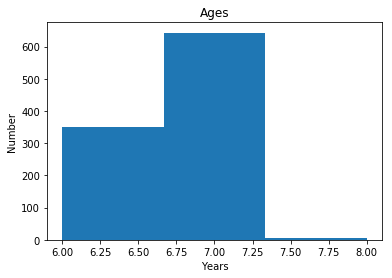

In [2]:
"""
NAMES
List for the random name generator for the dataset. I am generating two lists. A list of sample girls and boys names 
from which a random selection will be chosen for the dataset.
"""

# The first names were extracted from excel from the CSO website, the most popular baby names from 2012 (https://www.cso.ie/en/releasesandpublications/er/ibn/irishbabiesnames2012/")
girl_firstname = ('Emily ','Sophie ','Emma ','Grace ','Lily ','Mia ','Ella ','Ava ','Lucy ','Sarah ','Aoife ','Amelia ','Hannah ','Katie ','Chloe ','Caoimhe ','Saoirse ','Kate ','Holly ','Ruby ','Sophia ','Anna ','Lauren ','Leah ','Amy ','Isabelle ','Molly ','Ellie ','Jessica ','Olivia ','Roisin ','Ciara ','Kayla ','Julia ','Zoe ','Laura ','Niamh ','Abbie ','Erin ','Rachel ','Robyn ','Aisling ','Faye ','Rebecca ','Eva ','Layla ','Ellen ','Cara ','Freya ','Abigail ','Eve ','Isabella ','Megan ','Aine ','Clodagh ','Aoibhinn ','Millie ','Nicole ','Aoibheann ','Maja ','Sadhbh ','Eabha ','Charlotte ','Amber ','Caitlin ','Sofia ','Alannah ','Zara ','Alice ','Maria ','Elizabeth ','Lena ','Mary ','Emilia ','Aimee ','Lilly ','Hollie ','Aoibhe ','Victoria ','Eimear ','Maya ','Isabel ','Orla ','Evie ','Kayleigh ','Brooke ','Clara ','Meabh ','Lexi ','Tara ','Daisy ','Katelyn ','Ailbhe ','Amelie ','Natalia ','Sara ','Hanna ','Laoise ','Ruth ','Madison ','Maeve ','Maisie ','Rose ',)
boy_firstname = ('Jack ','James ','Daniel ','Sean ','Conor ','Adam ','Harry ','Ryan ','Dylan ','Michael ','Luke ','Charlie ','Liam ','Oisin ','Cian ','Jamie ','Thomas ','Alex ','Noah ','Darragh ','Patrick ','Aaron ','Cillian ','Matthew ','John ','Nathan ','David ','Fionn ','Evan ','Ethan ','Jake ','Kyle ','Rian ','Ben ','Max ','Eoin ','Tadhg ','Finn ','Callum ','Samuel ','Joshua ','Rory ','Jayden ','Joseph ','Tyler ','Sam ','Shane ','Mark ','Robert ','Aidan ','William ','Ronan ','Eoghan ','Alexander ','Leon ','Cathal ','Mason ','Tom ','Oliver ','Andrew ','Oscar ','Ciaran ','Bobby ','Jacob ','Senan ','Rhys ','Scott ','Benjamin ','Cormac ','Kevin ','Lucas ','Alan ','Donnacha ','Jakub ','Christopher ','Filip ','Killian ','Josh ','Alfie ','Tommy ','Ruairi ','Odhran ','Oran ','Leo ','Isaac ','Dara ','Jason ','Zach ','Martin ','Peter ','Brian ','Danny ','Niall ','Tomas ','Edward ','Stephen ','Logan ','Kacper ','Anthony ','Billy ',)

# Surnames top 100 Irish surnames from (https://meanwhileinireland.com/ranked-top-100-irish-surnames-and-meanings/)
surname = ('Murphy','Kelly','O Sullivan','Walsh','Smith','O Brien','Byrne','Ryan','O Connor','O Neill','O Reilly','Doyle','McCarthy','Gallagher','O Doherty','Kennedy','Lynch','Murray','Quinn','Moore','McLoughlin','O Carroll','Connolly','Daly','O Connell','Wilson','Dunne','Brennan','Burke','Collins','Campbell','Clarke','Johnston','Hughes','O Farrell','Fitzgerald','Brown','Martin','Maguire','Nolan','Flynn','Thompson','O Callaghan','O Donnell','Duffy','O Mahony','Boyle','Healy','O Shea','White','Sweeney','Hayes','Kavanagh','Power','McGrath','Moran','Brady','Stewart','Casey','Foley','Fitzpatrick','O Leary','McDonnell','MacMahon','Donnelly','Regan','Donovan','Burns','Flanagan','Mullan','Barry','Kane','Robinson','Cunningham','Griffin','Kenny','Sheehan','Ward','Whelan','Lyons','Reid','Graham','Higgins','Cullen','Keane','King','Maher','MacKenna','Bell','Scott','Hogan','O Keeffe','Magee','MacNamara','MacDonald','MacDermott','Molony','O Rourke','Buckley','O Dwyer',)

# Create empty lists for girls and boys names
girlsname = []
boysname = []

# Generate a list of girls names - this list contains 10300 girlsnames
for i in girl_firstname:
    for j in surname:
        girlsname.append(i+j)
        
# Generate a list of boys names - the list contains 10,000 boysnames
for i in boy_firstname:
    for j in surname:
        boysname.append(i+j)
        
# Randomly choose 500 girls and the 500 boys names from the lists above
gnames = (np.random.choice(girlsname,500))
bnames = (np.random.choice(boysname,500))

# Combine the two lists into a single array
names = np.concatenate([gnames,bnames])


"""
AGE
List for age generator for the dataset. Randomely generate 1000 ages of 1st class students based on the CSO 2016 first class ages.
"""
age = np.random.choice([6,7,8], 1000, p=[0.34, 0.65, 0.01])

plt.hist(age, bins=3)
plt.title("Ages")
plt.xlabel("Years")
plt.ylabel("Number")
plt.show()


### Height
The height of each child is randomly selected based on age and gender. I have used the UK WHO growth charts as a basis for these as Ireland is moving to this model currently. Data is not available in Ireland yet for children ages 6 -8.[Ref VI](https://www.hse.ie/eng/health/child/growthmonitoring/)

[[Ref IV]](https://www.rcpch.ac.uk/sites/default/files/Boys_2-18_years_growth_chart.pdf)

| Boys Aged     | Min cm          | Median cm  | Max cm  |
| :-----------: |:-------------:  | :-------:  | :----:  |
| 6             | 103             |   119   | 129     |
| 7             | 108             |   122   | 136     |
| 8             | 113             |   128   | 142     |


[[Ref V]](https://www.rcpch.ac.uk/sites/default/files/Girls_2-18_years_growth_chart.pdf)


| Girls Aged     | Min cm          | Median cm  | Max cm  |
| :-----------: |:-------------:  | :-------:  | :----:  |
| 6             | 102             |   115   | 128     |
| 7             | 107             |   121   | 135     |
| 8             | 113             |   127   | 141     |

It is widely accepted that human heights follow a normal distribution. (See Tanner JM. Foetus Into Man: Physical Growth From Conception to Maturity. Cambridge, MA: Harvard University Press; 1990. & Snedecor GW, Cochran WG. Statistical Methods. Ames, IA: Iowa University; 1989. )I have used the numpy.random normal package to generate the heights based on gender and age according to the tables above. VII. [Ref VII](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2831262/#b27-dem-46-0001)

The python code to generate heights is below:


In [3]:
"""
HEIGHTS
Generate a random sample of lists of heights based on gender and age, on the normal distribution - per the UK WHO growth charts.
The random lists are generated for each age and gender. The height function randomly selects 
"""

height_boys_6 = np.round( np.random.normal(1.19, 0.029,10000 ), 2)
height_boys_7 = np.round( np.random.normal(1.22, 0.032,10000 ), 2)
height_boys_8 = np.round( np.random.normal(1.28, 0.032,10000 ), 2)

height_girls_6 = np.round( np.random.normal(1.15, 0.031,10000 ), 2)
height_girls_7 = np.round( np.random.normal(1.21, 0.032,10000 ), 2)
height_girls_8 = np.round( np.random.normal(1.27, 0.032,10000 ), 2)

"""
This function is called by the dataset to populate the height column. The random.choice function is used to randomly 
select a height from the correct list above dependig on age and gender
"""

def height (row):
    if row['Age']==6:
        if row['Gender'] == 'Female':
          return np.random.choice(height_girls_6,1)
    if row['Age']==6:
        if row['Gender'] == 'Male':
          return np.random.choice(height_boys_6,1)
    if row['Age']==7:
        if row['Gender'] == 'Female':
          return np.random.choice(height_girls_7,1)
    if row['Age']==7:
        if row['Gender'] == 'Male':
          return np.random.choice(height_boys_7,1)
    if row['Age']==8:
        if row['Gender'] == 'Female':
          return np.random.choice(height_girls_8,1)
    if row['Age']==8:
        if row['Gender'] == 'Male':
          return np.random.choice(height_boys_8,1)

        


### BMI

For the purpose of this simulation I have broken BMI into 3 categories: Thin-Normal; Overweight; Obese.

BMI is calculated using the same formula for adults and children. 

    Formula: BMI = weight (kg) / [height (m)]2

Adult BMI cutoff's are standard. For children it depends on gender and age. I used the childrens cutoffs at their age plus 6 months. [Adult BMI Ref VIII](https://en.wikipedia.org/wiki/Body_mass_index) 
[Boys BMI Ref IX](https://www.who.int/growthref/sft_bmifa_boys_z_5_19years.pdf?ua=1) 
[Girls BMI Ref X](https://www.who.int/growthref/sft_bmifa_girls_z_5_19years.pdf?ua=1) 



| BMI Cut-Offs    | Thin-Normal        | Overweight  | Obese   |
| :-----------: |:-------------:  | :-------:  | :----:  |
| Adult          | 15- 25             |   25 - 30   | 30-60     |
| Girl aged 6             | 11.7 - 17.1|   17.1 - 19.5   | 19.5 - 30     |
| Girl aged 7             | 11.8 - 17.5       |   17.5 - 20.1   | 20.1 - 30    |
| Girl aged 8             | 12.0- 18.0             |   18.0 - 21.0   | 21.0 - 30     |
| Boy aged 6             | 12.2 - 16.9             |   16.9 -18.7   | 18.7 - 30     |
| Boy aged 7             | 12.3 - 17.2             |   17.2 - 19.3   | 19.3 - 30     |
| Boy aged 8             | 12.5 - 17.7             |   17.7 - 20.1   | 20.1 - 30     |

I created the BMI's in two steps. The classification was generated first (based on gender and % from COSI 2012), and then BMI score generated depending on this classification, the student's age, and gender. 

A variety of different studies suggest BMI follows different probability distributions: normal; log normal, skew student t etc. There is no definitive study on children's BMIs distribution. [Ref XI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/)I have chosen log normal from the numpy.random package to generate the BMI data.

The COSI study in 2012 recorded BMI in first class students with a median value of 16.25; min value of 12.3; and max value of 26.1 averaged for boys and girls. [Ref II](http://www.ucd.ie/t4cms/COSI%20report%20(2014).pdf)

Creating the BMI data
1. I used log normal numpy.random to generate a list of values for BMI. 
2. I filtered this list  excluding all values outside the min and max BMIs of the 2012 COSI survey.
3. 18 individual lists were created for each classification gender age combination based on the WHO BMI cutoffs in the table above.
4. A function was written to check gender, age, and classification and chose a random sample from the appropriate list.

The code generating the BMI is below:


(array([872.,   0.,   0.,   0.,   0.,  20.,   0.,   0.,   0., 108.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

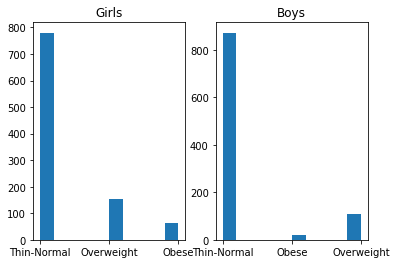

In [4]:
"""
BMI CLASSIFICATION
BMI classification generator was based on the percentages in the 2012 study in the introduction. 
I generated a 1000 random classification list according to the proportions from the 2012 study. 

"""

girlBmiClass = np.random.choice(['Thin-Normal','Overweight','Obese'], 1000, p=[0.786, 0.159, 0.055])

boyBmiClass = np.random.choice(['Thin-Normal','Overweight','Obese'], 1000, p=[0.856, 0.122, 0.022])


"""
This function is called by the dataset to randomly select a BMI class from the lists above based on gender.
"""

def bmic (row):
    # if gender female - randomly choose a classification from the girls BMI class list
    if row['Gender'] == 'Female':
          return np.random.choice(girlBmiClass,1)
    if row['Gender'] == 'Male':
          return np.random.choice(boyBmiClass,1)

        
"""
BMI
Generate a random sample of lists of BMI based on gender and age, on the  log normal distribution - per the UK WHO BMI growth
cutoffs.

The random lists are generated for each unique age, gender and BMI classification. The get BMI function randomly selects 
elements from the correct list according to age, gender and BMI classification.
"""

# Create a log normal random list rounded to one decimal place
mu, sigma = 16.25 , 2 # mean and standard deviation - standard deviation was chosen by trial and error
bmiNum = np.round(np.random.normal(mu, sigma, 10000),1)
#Filter out the numbers outside the min and max values
bmiNum = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 26.1)]

# filter the lists per the WHO cutoffs by category. TN -Thin-Normal; OW - Overweight; OB - Obese
bmi_TN_boys_6 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 16.9)]
bmi_TN_boys_7 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 17.2)]
bmi_TN_boys_8 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 17.7)]

bmi_TN_girls_6 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 17.1)]
bmi_TN_girls_7 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 17.5)]
bmi_TN_girls_8 = bmiNum [(bmiNum >= 12.3) & (bmiNum <= 18.0)]

bmi_OW_boys_6 = bmiNum [(bmiNum > 16.9) & (bmiNum <= 18.7)]
bmi_OW_boys_7 = bmiNum [(bmiNum > 17.2) & (bmiNum <= 19.3)]
bmi_OW_boys_8 = bmiNum [(bmiNum > 17.7) & (bmiNum <= 20.1)]

bmi_OW_girls_6 = bmiNum [(bmiNum > 17.1) & (bmiNum <= 19.5)]
bmi_OW_girls_7 = bmiNum [(bmiNum > 17.5) & (bmiNum <= 20.1)]
bmi_OW_girls_8 = bmiNum [(bmiNum > 18.0) & (bmiNum <= 21.0)]

bmi_OB_boys_6 = bmiNum [(bmiNum > 18.7) & (bmiNum <= 26.1)]
bmi_OB_boys_7 = bmiNum [(bmiNum > 19.3) & (bmiNum <= 26.1)]
bmi_OB_boys_8 = bmiNum [(bmiNum > 20.1) & (bmiNum <= 26.1)]

bmi_OB_girls_6 = bmiNum [(bmiNum > 19.5) & (bmiNum <= 26.1)]
bmi_OB_girls_7 = bmiNum [(bmiNum > 20.1) & (bmiNum <= 26.1)]
bmi_OB_girls_8 = bmiNum [(bmiNum > 21.0) & (bmiNum <= 26.1)]

"""
This function is called by the dataset to populate the bmi column. The random.choice function is used to randomly 
select a bmi from the correct list above dependig on age, gender and BMI classification.
"""

def bmi (row):
    
    #Thin-Normal BMI classification
    if row['Age']==6:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_girls_6,1)
    if row['Age']==6:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_boys_6,1)
    if row['Age']==7:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_girls_7,1)
    if row['Age']==7:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_boys_7,1)
    if row['Age']==8:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_girls_8,1)
    if row['Age']==8:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Thin-Normal':
              return np.random.choice(bmi_TN_boys_8,1)
    
    # Overweight Classification
    if row['Age']==6:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_girls_6,1)
    if row['Age']==6:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_boys_6,1)
    if row['Age']==7:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_girls_7,1)
    if row['Age']==7:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_boys_7,1)
    if row['Age']==8:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_girls_8,1)
    if row['Age']==8:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Overweight':
              return np.random.choice(bmi_OW_boys_8,1)
   
    # Obese Classification
    if row['Age']==6:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_girls_6,1)
    if row['Age']==6:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_boys_6,1)
    if row['Age']==7:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_girls_7,1)
    if row['Age']==7:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_boys_7,1)
    if row['Age']==8:
        if row['Gender'] == 'Female':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_girls_8,1)
    if row['Age']==8:
        if row['Gender'] == 'Male':
            if row['BMI Class'] == 'Obese':
              return np.random.choice(bmi_OB_boys_8,1)
        
        



        



# plot the overall BMI classification lists by gender
plt.subplot(1, 2, 1)
plt.title("Girls")
plt.hist(girlBmiClass)

plt.subplot(1, 2, 2)
plt.title("Boys")
plt.hist(boyBmiClass)


### Weight

To generate the BMI I used the classification porportions from the COSI 2012 survey.

I calculated the weight in Kg from the height and BMI of each first class student, using the values in the columns and the formula below:

    Formula: weight (kg) = BMI * [height (m)]2



## Dataset Creation

The dataset is created in the cell below, populated using the variables and functions coded above. Note the values in columns: Age is in years; Height is in meters; & Weight is in kg.

There was an error when I  attempted to change the datatype of the column Weight from object to float. I commented out this line of code as I have been unable to reproduce this error.



In [5]:
# Create the dataset containing the list of names and ages and an empy column for each of the other variables.
d = {'Name': names, 'Age': age, 'Gender': '', 'Height': '', 'Weight': '', 'BMI Class': '', 'BMI' : '' }

df = pd.DataFrame(data=d) 

# Populate the gender variable in the dataset. If the name is part of the gnames list return female, else return male.
df['Gender'] = np.where(np.isin(df['Name'],gnames), 'Female', 'Male')

# Populate the height variable 
df['Height'] = df.apply(lambda row: height(row),axis=1)
# Change datatype to float
df['Height'] = df['Height'].str[0]

# Populate the BMI classification variable according to the 2012 proportions
df['BMI Class'] = df.apply(lambda row: bmic(row),axis=1)
df['BMI Class'] = df['BMI Class'].str[0]

# Populate the bmi variable 
df['BMI'] = df.apply(lambda row: bmi(row),axis=1)
# Change datatype to float
df['BMI'] = df['BMI'].str[0]

#Populate the weight variable based on the BMI value and height
df['Weight'] = (df['Height']*df['Height']*df['BMI'])

# Change datatype to float - caused error when cell rerun
#df['Weight'] = df['Weight'].str[0]
# Round weights to one decimal place
df['Weight'] = round(df['Weight'],1)

df

,Name,Age,Gender,Height,Weight,BMI Class,BMI
0,Lexi Walsh,7,Female,1.21,22.3,Thin-Normal,15.2
1,Robyn O Connor,7,Female,1.26,25.1,Thin-Normal,15.8
2,Lily Moore,7,Female,1.24,22.8,Thin-Normal,14.8
3,Leah Moran,6,Female,1.12,21.1,Thin-Normal,16.8
4,Alannah Quinn,7,Female,1.20,25.9,Overweight,18.0
5,Clara Healy,6,Female,1.18,21.7,Thin-Normal,15.6
6,Grace Johnston,6,Female,1.10,18.0,Thin-Normal,14.9
7,Ciara Lynch,7,Female,1.25,20.6,Thin-Normal,13.2
8,Ailbhe MacDermott,7,Female,1.17,23.3,Thin-Normal,17.0
9,Lily O Donnell,7,Female,1.21,25.5,Thin-Normal,17.4


## Analysis

I have analysed the dataset below, both graphically and using the summary stats of the dataframe. For the summary stats I have split the dataframe into two, one for girls and one for boys. The second table for both girls and boys was to show a count of the BMI breakdown by gender.

**Summary stats of the numerical variables in the dataset**

**Girls summary statistics**

In [6]:
# Create a subset of the dataframe by gender
df_girl = (df[(df['Gender'] == 'Female')])
df_boy = (df[(df['Gender'] == 'Male')])

# Girsl summary stats
df_girl.describe()

,Age,Height,Weight,BMI
count,500.000000,500.000000,500.000000,500.000000
mean,6.660000,1.187900,23.026800,16.289800
std,0.486697,0.043029,3.398868,2.022944
min,6.000000,1.070000,15.400000,12.300000
25%,6.000000,1.160000,20.800000,14.900000
50%,7.000000,1.190000,22.700000,16.100000
75%,7.000000,1.220000,25.100000,17.300000
max,8.000000,1.310000,35.900000,24.100000


In [7]:
# Display a count of each BMI class for girls
grpG = df_girl.groupby('BMI Class')
grpG.describe()

Age                                                 BMI  \
             count      mean       std  min  25%  50%  75%  max  count   
BMI Class                                                                
Obese         39.0  6.641026  0.537400  6.0  6.0  7.0  7.0  8.0   39.0   
Overweight    68.0  6.588235  0.495812  6.0  6.0  7.0  7.0  7.0   68.0   
Thin-Normal  393.0  6.674300  0.479983  6.0  6.0  7.0  7.0  8.0  393.0   

                        ...  Height       Weight                             \
                  mean  ...     75%   max  count       mean       std   min   
BMI Class               ...                                                   
Obese        20.702564  ...    1.23  1.30   39.0  29.341026  3.224798  24.6   
Overweight   18.469118  ...    1.21  1.26   68.0  25.836765  2.118427  21.1   
Thin-Normal  15.474809  ...    1.22  1.31  393.0  21.913995  2.520454  15.4   

                                         
               25%    50%     75%   max  
BMI Class                                
Obese        26.45  28.80  32.350  35.9  
Overweight   24.10  25.85  27.225  30.5  
Thin-Normal  20.10  22.00  23.700  28.5  

[3 rows x 32 columns]

**Boys summary statistics**

In [8]:
#Boys summary stats
df_boy.describe()


,Age,Height,Weight,BMI
count,500.000000,500.000000,500.000000,500.000000
mean,6.654000,1.209920,23.066600,15.741400
std,0.492716,0.033224,2.737944,1.608478
min,6.000000,1.110000,15.800000,12.300000
25%,6.000000,1.190000,21.200000,14.600000
50%,7.000000,1.210000,22.850000,15.750000
75%,7.000000,1.230000,24.900000,16.700000
max,8.000000,1.330000,35.000000,21.900000


In [9]:
# Display a count of each BMI class
grpB = df_boy.groupby('BMI Class')
grpB.describe()

Age                                                 BMI  \
             count      mean       std  min  25%  50%  75%  max  count   
BMI Class                                                                
Obese         11.0  6.818182  0.404520  6.0  7.0  7.0  7.0  7.0   11.0   
Overweight    60.0  6.766667  0.499717  6.0  6.0  7.0  7.0  8.0   60.0   
Thin-Normal  429.0  6.634033  0.491857  6.0  6.0  7.0  7.0  8.0  429.0   

                        ...  Height       Weight                             \
                  mean  ...     75%   max  count       mean       std   min   
BMI Class               ...                                                   
Obese        20.290909  ...   1.215  1.24   11.0  29.109091  1.872674  25.8   
Overweight   17.981667  ...   1.240  1.33   60.0  26.548333  2.218603  22.6   
Thin-Normal  15.311422  ...   1.230  1.32  429.0  22.424709  2.220054  15.8   

                                       
               25%   50%    75%   max  
BMI Class                              
Obese        28.35  28.8  30.05  32.2  
Overweight   24.90  26.6  27.50  35.0  
Thin-Normal  21.00  22.4  24.10  28.2  

[3 rows x 32 columns]

To visualise the releationships I have created 5 plots of the dataset below. The BMI classification, height weight and age followed the expected trends. However due to how the  data is randomly generated the data does not fully mirror the original survey.

Visually you can see the trend of a higher number of obese and overweight girls than boys. This is most clearly evident on the Obese plot of the  three plots side by side below. Where each plot is by BMI classification type.

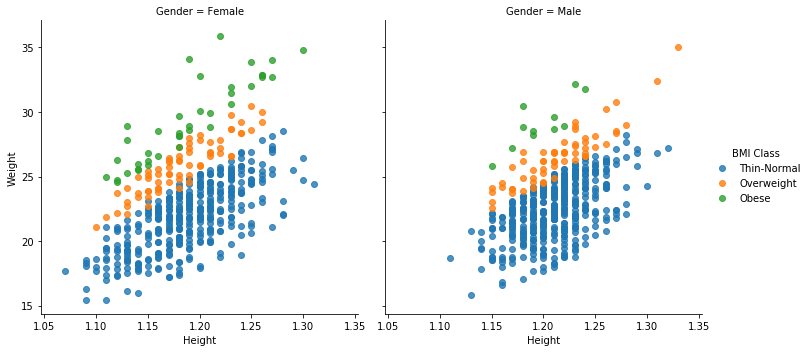

In [10]:
# Plot BMI classification by gender
sns.lmplot('Height', 'Weight', data=df, fit_reg=False, hue='BMI Class', col='Gender')


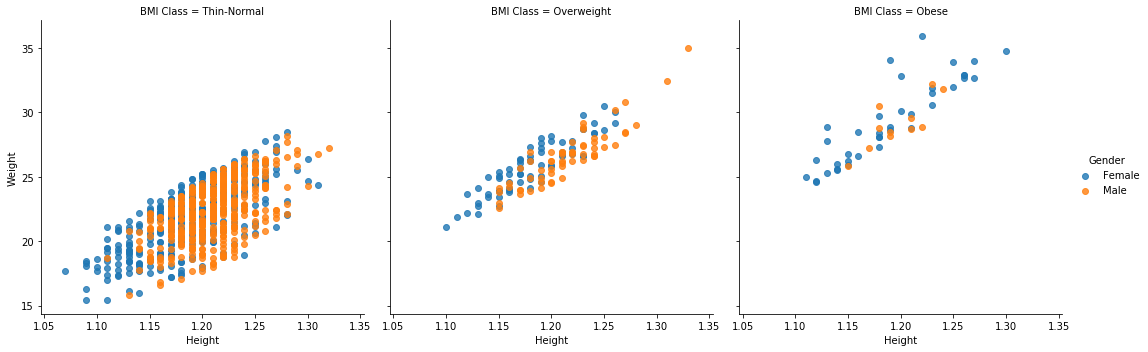

In [11]:

sns.lmplot('Height', 'Weight', data=df, fit_reg=False, hue='Gender', col='BMI Class')



## References

I. The Childhood Obesity Surveillance Initiative (COSI) in the Republic of Ireland Findings 2015 [COSI Report 2015](https://www.hse.ie/eng/about/who/healthwellbeing/our-priority-programmes/heal/heal-docs/cosi-in-the-republic-of-ireland-findings-from-2008-2010-2012-and-2015.pdf)

II.  The Childhood Obesity Surveillance Initiative (COSI) in the Republic of Ireland Findings 2012 [COSI Report 2012](http://www.ucd.ie/t4cms/COSI%20report%20(2014).pdf)

III. CSO - [Ages of children in first class] (https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EDA42&PLanguage=0)

IV. Heights [UK WHO growth chart boys](https://www.rcpch.ac.uk/sites/default/files/Boys_2-18_years_growth_chart.pdf)

V. Heights [UK WHO growth chart girls](https://www.rcpch.ac.uk/sites/default/files/Girls_2-18_years_growth_chart.pdf)

VI. Heights [Growth monitoring resources](https://www.hse.ie/eng/health/child/growthmonitoring/)

VII. Heights [Normally distributed](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2831262/#b27-dem-46-0001)

VIII. BMI Wiki [BMI Wiki](https://en.wikipedia.org/wiki/Body_mass_index)

IX. WHO BMI Boys [Boys BMI](https://www.who.int/growthref/sft_bmifa_boys_z_5_19years.pdf?ua=1) 

x. WHO BMI Girls [Girls BMI](https://www.who.int/growthref/sft_bmifa_girls_z_5_19years.pdf?ua=1) 

XI. BMI distribution curve [BMI distribution](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/)